# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.064651e+01     7.253168e+00
 * time: 0.004086017608642578
     1     2.659415e+01     3.991158e+00
 * time: 0.011980056762695312
     2     1.840104e+01     3.868532e+00
 * time: 0.030929088592529297
     3     1.626303e+01     4.040297e+00
 * time: 0.04950904846191406
     4     1.214887e+01     1.615609e+00
 * time: 0.0682671070098877
     5     1.071282e+01     7.306101e-01
 * time: 0.0867621898651123
     6     1.024495e+01     1.027360e+00
 * time: 0.10173201560974121
     7     9.870795e+00     7.064660e-01
 * time: 0.162675142288208
     8     9.652622e+00     5.583064e-01
 * time: 0.1780250072479248
     9     9.491132e+00     9.029656e-01
 * time: 0.18911504745483398
    10     9.441601e+00     6.318177e-01
 * time: 0.2004070281982422
    11     9.386736e+00     5.374491e-01
 * time: 0.21524715423583984
    12     9.321993e+00     4.802624e-01
 * time: 0.23023009300231934
    13     9.251620e+00     3.700291e-01
 * time: 0.

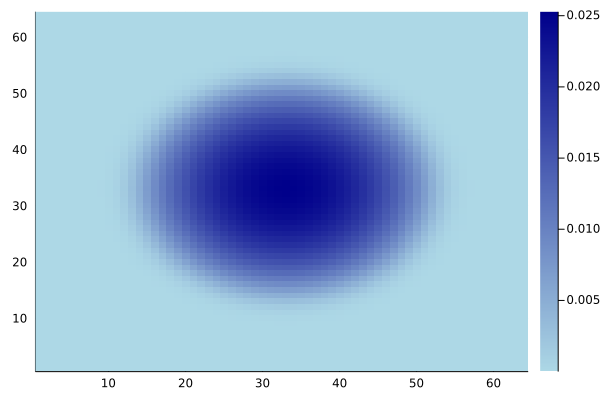

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)